#### STUDI DATA MINING : PENGELOMPOKAN DAN PREDIKSI GAJI BERDASARKAN ATRIBUT PEKERJAAN 

In [1]:
import pandas as pd

df = pd.read_csv('ds.csv')

In [2]:
df.head()

,work_year,experience_level,employment_type,job_title,salary_currency,salary,employee_residence,remote_ratio,company_location,company_size
0,2022,EN,FT,Analytics Engineer,USD,130000,US,50,US,L
1,2023,EN,FT,Applied Machine Learning Scientist,EUR,42923,DE,50,DE,M
2,2023,EN,FT,Autonomous Vehicle Technician,USD,7000,GH,0,GH,S
3,2023,EN,FT,Business Data Analyst,EUR,21461,ES,0,ES,M
4,2023,EN,FT,Business Data Analyst,EUR,12877,GR,50,GR,L


In [3]:
df.describe()

,work_year,salary,remote_ratio
count,3755.000000,3755.000000,3755.000000
mean,2022.373635,137570.389880,46.271638
std,0.691448,63055.625278,48.589050
min,2020.000000,5132.000000,0.000000
25%,2022.000000,95000.000000,0.000000
50%,2022.000000,135000.000000,0.000000
75%,2023.000000,175000.000000,100.000000
max,2023.000000,450000.000000,100.000000


### Data Duplicate

In [4]:
duplicates = df.duplicated().sum()
print("Jumlah data duplikat :", duplicates)
duplicates = df[df.duplicated()]
print("Data yang Duplikat:\n", duplicates)

Jumlah data duplikat : 1176
Data yang Duplikat:
       work_year experience_level employment_type     job_title  \
20         2023               EN              FT  Data Analyst   
25         2023               EN              FT  Data Analyst   
40         2022               EN              FT  Data Analyst   
65         2023               EN              FT  Data Analyst   
72         2023               EN              FT  Data Analyst   
...         ...              ...             ...           ...   
3744       2022               SE              FT     Scientist   
3746       2023               SE              FT     Scientist   
3748       2022               SE              FT     Scientist   
3749       2022               SE              FT     Scientist   
3753       2022               SE              FT     Scientist   

     salary_currency  salary employee_residence  remote_ratio  \
20               USD   48000                 US             0   
25               USD   55000

In [5]:
df_cleaned = df.drop_duplicates()
print("\nData setelah duplikat dihapus:\n", df_cleaned)


Data setelah duplikat dihapus:
       work_year experience_level employment_type  \
0          2022               EN              FT   
1          2023               EN              FT   
2          2023               EN              FT   
3          2023               EN              FT   
4          2023               EN              FT   
...         ...              ...             ...   
3747       2022               SE              FT   
3750       2022               SE              FT   
3751       2023               SE              FT   
3752       2022               SE              FT   
3754       2022               SE              FT   

                               job_title salary_currency  salary  \
0                     Analytics Engineer             USD  130000   
1     Applied Machine Learning Scientist             EUR   42923   
2          Autonomous Vehicle Technician             USD    7000   
3                  Business Data Analyst             EUR   21461   
4 

In [6]:
df_cleaned_duplicates = df_cleaned.duplicated().sum()
print("Data duplikasi setelah drop :",df_cleaned_duplicates)

Data duplikasi setelah drop : 0


### Data Null

In [7]:
df = df_cleaned
df.nunique()

work_year                4
experience_level         4
employment_type          4
job_title               64
salary_currency         20
salary                1035
employee_residence      78
remote_ratio             3
company_location        72
company_size             3
dtype: int64

In [8]:
missingvalue = df.isnull().sum()
print(missingvalue)

work_year             0
experience_level      0
employment_type       0
job_title             0
salary_currency       0
salary                0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


### Data Outlier

In [9]:
numeric_cols = df.select_dtypes(include=['float64', 'int64'])
Q1 = numeric_cols.quantile(0.25)
Q3 = numeric_cols.quantile(0.75)
IQR = Q3 - Q1
df_cleaned_duplicates = df[~((numeric_cols < (Q1 - 1.5 * IQR)) | (numeric_cols > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_cleaned_duplicates)

      work_year experience_level employment_type  \
0          2022               EN              FT   
1          2023               EN              FT   
2          2023               EN              FT   
3          2023               EN              FT   
4          2023               EN              FT   
...         ...              ...             ...   
3745       2023               SE              FT   
3747       2022               SE              FT   
3750       2022               SE              FT   
3751       2023               SE              FT   
3752       2022               SE              FT   

                               job_title salary_currency  salary  \
0                     Analytics Engineer             USD  130000   
1     Applied Machine Learning Scientist             EUR   42923   
2          Autonomous Vehicle Technician             USD    7000   
3                  Business Data Analyst             EUR   21461   
4                  Business Data An

In [10]:
df = df_cleaned_duplicates
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2478 entries, 0 to 3752
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           2478 non-null   int64 
 1   experience_level    2478 non-null   object
 2   employment_type     2478 non-null   object
 3   job_title           2478 non-null   object
 4   salary_currency     2478 non-null   object
 5   salary              2478 non-null   int64 
 6   employee_residence  2478 non-null   object
 7   remote_ratio        2478 non-null   int64 
 8   company_location    2478 non-null   object
 9   company_size        2478 non-null   object
dtypes: int64(3), object(7)
memory usage: 213.0+ KB


### Data Quality

In [11]:
df['experience_level'] = df['experience_level'].replace({
    'SE': 'Senior',
    'EN': 'Entry level',
    'EX': 'Executive level',
    'MI': 'Mid/Intermediate level',
})

df['employment_type'] = df['employment_type'].replace({
    'FL': 'Freelancer',
    'CT': 'Contractor',
    'FT' : 'Full-time',
    'PT' : 'Part-time'
})
df['company_size'] = df['company_size'].replace({
    'S': 'SMALL',
    'M': 'MEDIUM',
    'L' : 'LARGE',
})
df['remote_ratio'] = df['remote_ratio'].astype(str)
df['remote_ratio'] = df['remote_ratio'].replace({
    '0': 'On-Site',
    '50': 'Half-Remote',
    '100' : 'Full-Remote',
})

C:\Users\Sadewa\AppData\Local\Temp\ipykernel_2932\4219529401.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['experience_level'] = df['experience_level'].replace({
C:\Users\Sadewa\AppData\Local\Temp\ipykernel_2932\4219529401.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['employment_type'] = df['employment_type'].replace({
C:\Users\Sadewa\AppData\Local\Temp\ipykernel_2932\4219529401.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2478 entries, 0 to 3752
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           2478 non-null   int64 
 1   experience_level    2478 non-null   object
 2   employment_type     2478 non-null   object
 3   job_title           2478 non-null   object
 4   salary_currency     2478 non-null   object
 5   salary              2478 non-null   int64 
 6   employee_residence  2478 non-null   object
 7   remote_ratio        2478 non-null   object
 8   company_location    2478 non-null   object
 9   company_size        2478 non-null   object
dtypes: int64(2), object(8)
memory usage: 213.0+ KB


### Visualization

In [13]:
top_salary = df.groupby('job_title').agg({'salary':'mean'}).sort_values(by='salary', ascending=False).head(7)
top_salary.head(7)

,salary
job_title,
Cloud Data Architect,250000.000000
Data Lead,212500.000000
Data Science Manager,181768.019608
Data Infrastructure Engineer,175051.666667
Machine Learning Manager,175000.000000
Business Intelligence Engineer,174150.000000
Machine Learning Software Engineer,172133.333333


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

label_encoders = {}
for column in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

X = df.drop('experience_level', axis=1)  
y = df['experience_level']  

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

C:\Users\Sadewa\AppData\Local\Temp\ipykernel_2932\3635875284.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = le.fit_transform(df[column])
C:\Users\Sadewa\AppData\Local\Temp\ipykernel_2932\3635875284.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = le.fit_transform(df[column])
C:\Users\Sadewa\AppData\Local\Temp\ipykernel_2932\3635875284.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

In [15]:
# from imblearn.over_sampling import SMOTE

# smote = SMOTE(random_state=42)
# X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [16]:
class_counts = pd.Series(y_train).value_counts()
print("Distribusi kelas:")
print(class_counts)

Distribusi kelas:
experience_level
3    1213
2     497
0     200
1      72
Name: count, dtype: int64


In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

print(f"Best Parameters: {grid_search.best_params_}")

best_rf_model = grid_search.best_estimator_

y_pred = best_rf_model.predict(X_test)

print("\nAccuracy:")
print(accuracy_score(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


c:\Users\Sadewa\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
226 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Sadewa\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Sadewa\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File

Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

Accuracy:
0.6814516129032258

Confusion Matrix:
[[ 14   0  12  22]
 [  0   1   0  15]
 [  6   0  45  81]
 [  4   0  18 278]]

Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.29      0.39        48
           1       1.00      0.06      0.12        16
           2       0.60      0.34      0.43       132
           3       0.70      0.93      0.80       300

    accuracy                           0.68       496
   macro avg       0.72      0.41      0.44       496
weighted avg       0.67      0.68      0.64       496



In [19]:
new_data = pd.DataFrame({
    'work_year': [2023],
    'employment_type': ['Full-time'],
    'job_title': ['Machine Learning Engineer'],
    'salary_currency': ['USD'],
    'salary': [121523],
    'employee_residence': ['US'],
    'remote_ratio': ['On-Site'],
    'company_location': ['US'],
    'company_size': ['MEDIUM']
})

for column in label_encoders:
    if column != 'experience_level':  
        new_data[column] = label_encoders[column].transform(new_data[column])

y_pred = best_rf_model.predict(new_data)

predicted_experience_level = label_encoders['experience_level'].inverse_transform(y_pred)

print(f"Predicted Experience Level: {predicted_experience_level[0]}")

Predicted Experience Level: Senior


c:\Users\Sadewa\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [20]:
df.head()

,work_year,experience_level,employment_type,job_title,salary_currency,salary,employee_residence,remote_ratio,company_location,company_size
0,2022,0,2,0,17,130000,72,1,68,0
1,2023,0,2,2,7,42923,20,1,20,1
2,2023,0,2,3,17,7000,30,2,29,2
3,2023,0,2,4,7,21461,26,2,25,1
4,2023,0,2,4,7,12877,31,1,30,0


In [21]:
class_counts = pd.Series(y_train).value_counts()
print("Distribusi kelas:")
print(class_counts)

Distribusi kelas:
experience_level
3    1213
2     497
0     200
1      72
Name: count, dtype: int64


### Clustering K-Means

In [22]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [23]:
X = df[['job_title','salary']]

In [24]:
inertia = []
K = range(1,11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

c:\Users\Sadewa\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\Sadewa\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


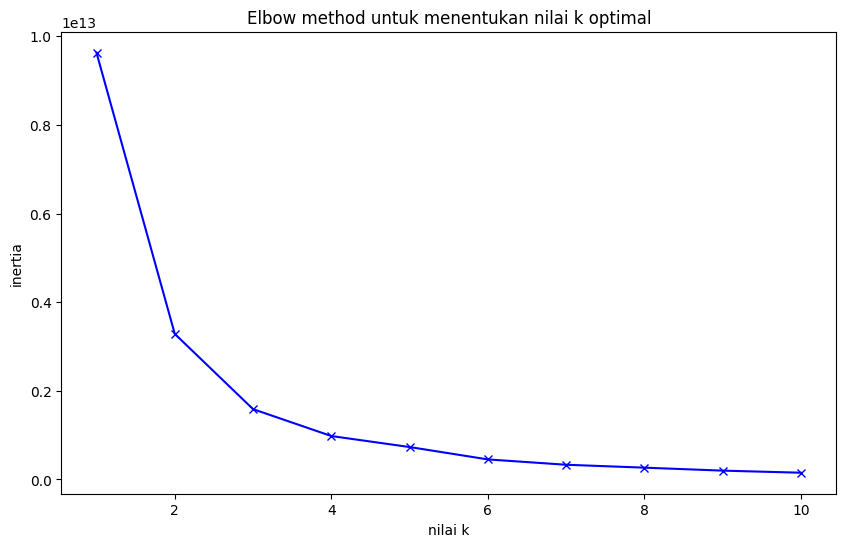

In [25]:
plt.figure(figsize=(10,6))
plt.plot(K, inertia, 'bx-')
plt.xlabel("nilai k")
plt.ylabel("inertia")
plt.title("Elbow method untuk menentukan nilai k optimal")
plt.show()

In [26]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)

KMeans(n_clusters=2, random_state=42)

In [27]:
df["cluster"] = kmeans.labels_

C:\Users\Sadewa\AppData\Local\Temp\ipykernel_2932\1510746749.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["cluster"] = kmeans.labels_


In [28]:
labels = kmeans.predict(X)
print("hasi prediksi: ", labels)

hasi prediksi:  [0 0 0 ... 1 1 1]


In [29]:
from sklearn.decomposition import PCA
import seaborn as sns
import pandas as pd
from sklearn.metrics import silhouette_score

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [30]:
pca_df = pd.DataFrame(data=X_pca, columns=["PC1","PC2"])
pca_df["Cluster"] = kmeans.fit_predict(X_scaled)
pca_df.describe()

,PC1,PC2,Cluster
count,2.478000e+03,2.478000e+03,2478.000000
mean,-9.175693e-17,-3.440885e-17,0.787732
std,1.057622e+00,9.392784e-01,0.408996
min,-2.628034e+00,-3.000904e+00,0.000000
25%,-7.786038e-01,-6.205922e-01,1.000000
50%,-1.040770e-01,-3.639537e-02,1.000000
75%,6.750429e-01,5.749391e-01,1.000000
max,3.568070e+00,2.921818e+00,1.000000


Text(0, 0.5, 'Salary')

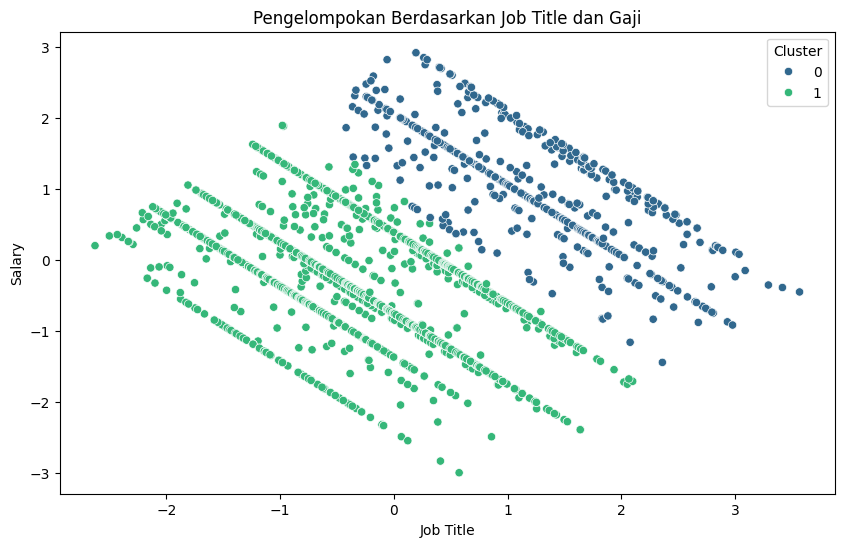

In [31]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="Cluster", palette="viridis")
plt.title("Pengelompokan Berdasarkan Job Title dan Gaji")
plt.xlabel("Job Title")
plt.ylabel("Salary")

In [32]:
score = silhouette_score(X_scaled, pca_df["Cluster"])
print("Silhouette_score: ", score)

Silhouette_score:  0.4243219755380247


In [33]:
from sklearn.model_selection import GridSearchCV

In [34]:
param_grid = {
    "n_clusters":range(2,11),
    "init": ["k-means++", "random"],
    "n_init": [10,20,30],
    "max_iter": [100,200,300]
}

In [35]:
grid_search = GridSearchCV(estimator=kmeans, param_grid=param_grid, refit=False, cv=10)

In [36]:
grid_search.fit(X_scaled)

GridSearchCV(cv=10, estimator=KMeans(n_clusters=2, random_state=42),
             param_grid={'init': ['k-means++', 'random'],
                         'max_iter': [100, 200, 300],
                         'n_clusters': range(2, 11), 'n_init': [10, 20, 30]},
             refit=False)

In [37]:
best_score = -1
best_params = None

In [38]:
for params in grid_search.cv_results_['params']:
    model = KMeans(**params)
    cluster_labels = model.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, cluster_labels)

    if score > best_score:
        best_score = score
        best_params = params

In [39]:
print("best parameter: ", best_params)
print("best score: ", best_score)

best parameter:  {'init': 'k-means++', 'max_iter': 100, 'n_clusters': 9, 'n_init': 20}
best score:  0.40959094731845286


### Deployment

In [46]:
import streamlit as st
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import pickle

with open('model.pkl', 'wb') as f:
    pickle.dump(best_rf_model, f)

st.set_page_config(
    page_title="KERJAAJA - Prediksi & Klasifikasi Level",
    page_icon="💼",
    layout="wide"
)

st.markdown("""
    <style>
    .main {
        padding: 0rem 1rem;
    }
    .stButton>button {
        width: 100%;
        height: 3em;
        margin-top: 1em;
    }
    .sidebar .sidebar-content {
        background-color: #f0f2f6;
    }
    </style>
    """, unsafe_allow_html=True)

@st.cache_data
def load_data():
    df = pd.read_csv('ds.csv')
    return df

@st.cache_data
def prepare_model(df):
    
    X = df[[
        'work_year', 'salary', 'remote_ratio', 
        'company_size', 'employment_type'
    ]]
    
    le_dict = {}
    categorical_cols = ['company_size', 'employment_type', 'remote_ratio']
    for col in categorical_cols:
        le = LabelEncoder()
        X[col] = le.fit_transform(df[col])
        le_dict[col] = le
    
    le = LabelEncoder()
    y = le.fit_transform(df['experience_level'])
    
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_train, y_train)
    
    return clf, scaler, le, le_dict

def perform_clustering(X_scaled, n_clusters=10):
    kmeans = KMeans(
        n_clusters=n_clusters,
        init='random',
        max_iter=300,
        n_init=10,
        random_state=42
    )
    clusters = kmeans.fit_predict(X_scaled)
    return clusters

def main():
    # Header
    st.title("💼 KERJAAJA")
    st.subheader("Sistem Prediksi Level Pengalaman dan Clustering")

    df = load_data()
    clf, scaler, le, le_dict = prepare_model(df)

    st.sidebar.title("Menu")
    page = st.sidebar.radio("Pilih Analisis:", ["Klasifikasi Level", "Clustering Data"])

    if page == "Klasifikasi Level":
        st.header("Klasifikasi Level Pengalaman")
        
        with st.form("classification_form"):
            col1, col2 = st.columns(2)
            
            with col1:
                work_year = st.selectbox(
                    "Tahun Kerja",
                    options=[2020, 2021, 2022, 2023],
                    index=3 
                )
                
                employment_type = st.selectbox(
                    "Tipe Pekerjaan",
                    options=['Full-time', 'Part-time', 'Contract', 'Freelance'],
                    index=0  
                )
                
                job_title = st.selectbox(
                    "Posisi",
                    options=sorted(df['job_title'].unique()),
                    index=df['job_title'].unique().tolist().index('Machine Learning Engineer')
                )
                
                salary_currency = st.selectbox(
                    "Mata Uang",
                    options=['USD', 'EUR', 'GBP'],
                    index=0  
                )
                
                salary = st.number_input(
                    "Gaji",
                    min_value=5000,
                    max_value=500000,
                    value=121523 
                )
                
            with col2:
                employee_residence = st.selectbox(
                    "Negara Karyawan",
                    options=sorted(df['employee_residence'].unique()),
                    index=df['employee_residence'].unique().tolist().index('US')
                )
                
                remote_ratio = st.selectbox(
                    "Remote Ratio",
                    options=['On-Site', 'Half-Remote', 'Full-Remote'],
                    index=0  
                )
                
                company_location = st.selectbox(
                    "Lokasi Perusahaan",
                    options=sorted(df['company_location'].unique()),
                    index=df['company_location'].unique().tolist().index('US')
                )
                
                company_size = st.selectbox(
                    "Ukuran Perusahaan",
                    options=['SMALL', 'MEDIUM', 'LARGE'],
                    index=1  
                )
            
            submitted = st.form_submit_button("Prediksi Level")
            
            if submitted:
        
                remote_map = {'On-Site': 0, 'Half-Remote': 50, 'Full-Remote': 100}
                remote_numeric = remote_map[remote_ratio]
                
                input_data = np.array([[
                    work_year, 
                    salary,
                    remote_numeric,
                    le_dict['company_size'].transform([company_size])[0],
                    le_dict['employment_type'].transform([employment_type])[0]
                ]])
                
                input_scaled = scaler.transform(input_data)
                
                prediction = clf.predict(input_scaled)
                probabilities = clf.predict_proba(input_scaled)
                confidence = np.max(probabilities) * 100
                
                predicted_level = le.inverse_transform(prediction)[0]
                
                st.success("Hasil Prediksi Level Pengalaman:")
                col1, col2 = st.columns(2)
                with col1:
                    st.metric("Level Pengalaman", predicted_level)
                with col2:
                    st.metric("Confidence Score", f"{confidence:.2f}%")
                
                prob_df = pd.DataFrame({
                    'Level': le.classes_,
                    'Probability': probabilities[0] * 100
                })
                
                fig = px.bar(
                    prob_df, 
                    x='Level', 
                    y='Probability',
                    title='Distribusi Probabilitas Level Pengalaman'
                )
                st.plotly_chart(fig)

    else:  
        st.header("Analisis Clustering")
        
        features = ['job_title', 'salary']
        X = df[features]
        
        le_job = LabelEncoder()
        X['job_title'] = le_job.fit_transform(X['job_title'])
        
        X_scaled = StandardScaler().fit_transform(X)
        
        n_clusters = st.slider("Jumlah Cluster", 2, 10, 5)
        
        clusters = perform_clustering(X_scaled, n_clusters)
        df['Cluster'] = clusters

        col1, col2 = st.columns(2)

        with col1:
            st.subheader("Distribusi Gaji berdasarkan Job Title")
            fig1 = px.box(df, x="job_title", y="salary", color="job_title")
            fig1.update_layout(showlegend=False)
            st.plotly_chart(fig1, use_container_width=True)

        with col2:
            st.subheader("Distribusi Gaji per Cluster")
            fig2 = px.box(df, x="Cluster", y="salary", color="Cluster")
            st.plotly_chart(fig2, use_container_width=True)

        st.subheader("Hasil Clustering")
        pca = PCA(n_components=2)
        X_pca = pca.fit_transform(X_scaled)
        
        pca_df = pd.DataFrame(
            data=X_pca,
            columns=['PC1', 'PC2']
        )
        pca_df['Cluster'] = clusters
        
        fig3 = px.scatter(
            pca_df,
            x='PC1',
            y='PC2',
            color='Cluster',
            title='Visualisasi Cluster berdasarkan Job Title dan Gaji'
        )
        st.plotly_chart(fig3, use_container_width=True)

        st.subheader("Statistik Ringkasan")
        col3, col4 = st.columns(2)

        with col3:
            st.write("Statistik Gaji per Cluster")
            st.dataframe(df.groupby('Cluster')['salary'].describe())

        with col4:
            st.write("Rata-rata Gaji per Job Title")
            st.dataframe(df.groupby('job_title')['salary'].mean().sort_values(ascending=False).head())

if __name__ == "__main__":
    main()

2025-01-03 22:26:08.539 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-03 22:26:08.540 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-03 22:26:08.541 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-03 22:26:08.542 No runtime found, using MemoryCacheStorageManager
2025-01-03 22:26:08.543 No runtime found, using MemoryCacheStorageManager
2025-01-03 22:26:08.545 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-03 22:26:08.545 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-03 22:26:08.546 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-03 22:26:08.546 Thread 'MainThread': missing ScriptRunContext! This warning can be ignor